# Identify customer segments for online retail with the use of K-means clustering

## Data Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#importing relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the Data:
Read data from various sources such as CSV files, Excel files, and SQL databases.

In [2]:
#loading the dataset

retail_df = pd.read_excel('Online Retail.xlsx')

In [3]:
#creating a copy
retail = retail_df.copy()

### 2. Understand the Data:
Explore basic information about the data, including head, info, and describe.
Check for missing values in the dataset.

In [4]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
retail.shape

(541909, 8)

In [7]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
# dropping columns 'InvoiceNo','StockCode','Description','Country' and 'InvoiceDate' as they are not needed for the analysis
retail.drop(['InvoiceNo','StockCode','Description','Country','InvoiceDate'],axis=1,inplace=True)

In [11]:
retail.columns

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [12]:
retail.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

### 3. Clean the Data:
Handle missing values by either dropping or filling them.
Remove duplicate entries in the dataset.
Correct data types as necessary.

In [13]:
# checking for missing values
retail.isnull().sum()

Quantity           0
UnitPrice          0
CustomerID    135080
dtype: int64

In [14]:
#checking percentage of missing values in the columns
(retail.isnull().sum()/retail.shape[0])*100

Quantity       0.000000
UnitPrice      0.000000
CustomerID    24.926694
dtype: float64

In [15]:
#dropping missing values
retail.dropna(inplace=True)

In [16]:
#checking mising values again (no missing values in the dataset now)
retail.isnull().sum()

Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64

In [17]:
#checking duplicates in the data
retail.duplicated().sum()

248432

In [18]:
#dropping the duplicates
retail.drop_duplicates(inplace=True)

In [19]:
#creating a new feature
retail['TotalAmount']  = retail['Quantity'] * retail['UnitPrice']

In [20]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158397 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     158397 non-null  int64  
 1   UnitPrice    158397 non-null  float64
 2   CustomerID   158397 non-null  float64
 3   TotalAmount  158397 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 6.0 MB


In [21]:
retail.head()

,Quantity,UnitPrice,CustomerID,TotalAmount
0,6,2.55,17850.0,15.30
1,6,3.39,17850.0,20.34
2,8,2.75,17850.0,22.00
5,2,7.65,17850.0,15.30
6,6,4.25,17850.0,25.50


In [22]:
#creating a list of columns to check for outliers
outlier_columns = ['Quantity','UnitPrice','TotalAmount']

In [23]:
##checking the number of outliers in outlier_columns

Q1 = retail[outlier_columns].quantile(0.25)
Q3 = retail[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Outlier detection using IQR
outliers = ((retail[outlier_columns] < (Q1 - 1.5 * IQR)) | (retail[outlier_columns] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

Quantity       14635
UnitPrice      10669
TotalAmount    16382
dtype: int64


In [24]:
# Calculating the lower and upper bounds using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Dataset shape before capping outliers:", retail.shape)

# Capping the outliers to the nearest boundary
retail_capped = retail.copy()
for col in outlier_columns:
    retail_capped[col] = np.where(retail_capped[col] < lower_bound[col], lower_bound[col], retail_capped[col])
    retail_capped[col] = np.where(retail_capped[col] > upper_bound[col], upper_bound[col], retail_capped[col])

# Dataset shape remains the same
print("Dataset shape after capping outliers:", retail_capped.shape)


Dataset shape before capping outliers: (158397, 4)
Dataset shape after capping outliers: (158397, 4)


In [25]:
#Once again checking for outliers

Q1 = retail_capped[outlier_columns].quantile(0.25)
Q3 = retail_capped[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Outlier detection using IQR
outliers = ((retail_capped[outlier_columns] < (Q1 - 1.5 * IQR)) | (retail_capped[outlier_columns] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

Quantity       0
UnitPrice      0
TotalAmount    0
dtype: int64


In [26]:
retail_capped[retail_capped.Quantity<0]

,Quantity,UnitPrice,CustomerID,TotalAmount
141,-1.0,9.035,14527.0,-21.15
154,-1.0,4.650,15311.0,-4.65
235,-12.0,1.650,17548.0,-19.80
236,-13.0,0.290,17548.0,-6.96
239,-12.0,3.450,17548.0,-21.15
...,...,...,...,...
540422,-13.0,2.080,16446.0,-21.15
540448,-12.0,1.950,14397.0,-21.15
540449,-11.0,0.830,14397.0,-9.13
541541,-1.0,9.035,15498.0,-21.15


#### There are Quantities which are less than 0 , possibly indicating cancellation or return,
#### dropping these rows and they will not be used in further analysis

In [27]:
retail_capped = retail_capped[retail_capped.Quantity>=0]

### Univariate Analysis

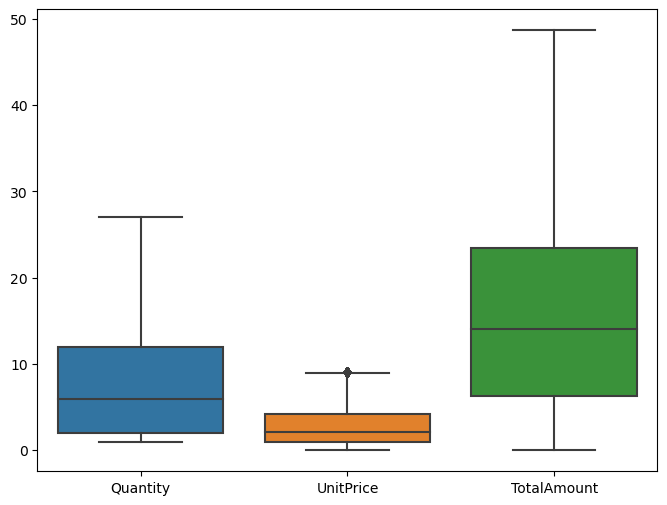

In [28]:
#creating boxplot for numeric variables
plt.figure(figsize=(8,6))
sns.boxplot(retail_capped[outlier_columns])
plt.show()

### 4. Transform the Data:
Normalize or standardize the data.
Encode categorical variables.

In [29]:
#importing libraries to scale the data, using MixMaxScaler
from sklearn.preprocessing import MinMaxScaler

## Run K-Means Clustering

#### 1. Standardize the Data

Standardize the data to ensure that each feature contributes equally to the distance calculations in K-Means.
Use StandardScaler from sklearn.preprocessing to standardize the features.

In [30]:
scaler = MinMaxScaler()

retail_scaled = scaler.fit_transform(retail_capped)

retail_scaled = pd.DataFrame(retail_scaled, columns=retail_capped.columns, index=retail_capped.index)

print(f"Scaled Data :\n{retail_scaled.head(20)}")

Scaled Data :
    Quantity  UnitPrice  CustomerID  TotalAmount
0   0.192308   0.282236    0.926443     0.314233
1   0.192308   0.375208    0.926443     0.417745
2   0.269231   0.304372    0.926443     0.451838
5   0.038462   0.846707    0.926443     0.314233
6   0.192308   0.470393    0.926443     0.523722
7   0.192308   0.204759    0.926443     0.227973
9   1.000000   0.187050    0.117994     1.000000
10  0.192308   0.232429    0.117994     0.258780
12  0.269231   0.415053    0.117994     0.616143
13  0.192308   0.182623    0.117994     0.203327
14  0.192308   0.470393    0.117994     0.523722
15  0.076923   0.547869    0.117994     0.304991
16  0.038462   1.000000    0.117994     0.408708
17  0.076923   0.658550    0.117994     0.366605
19  0.115385   0.879911    0.117994     0.653112
26  0.884615   0.415053    0.039892     1.000000
28  0.423077   0.415053    0.039892     0.924214
29  0.423077   0.094079    0.039892     0.209489
30  0.884615   0.071942    0.039892     0.320394
31  1.

In [31]:
#checking the dataframe
retail_scaled.head()

,Quantity,UnitPrice,CustomerID,TotalAmount
0,0.192308,0.282236,0.926443,0.314233
1,0.192308,0.375208,0.926443,0.417745
2,0.269231,0.304372,0.926443,0.451838
5,0.038462,0.846707,0.926443,0.314233
6,0.192308,0.470393,0.926443,0.523722


### 2. Determine the Optimal Number of Clusters

Use the Elbow Method to determine the optimal number of clusters (k).
<br>Calculate the within-cluster sum of squares (WCSS) for different values of k.
<br>Plot the WCSS against the number of clusters and look for the "elbow point" where the WCSS starts to decrease more slowly.


In [32]:
#importing Kmeans
from sklearn.cluster import KMeans

# copied from chatgpt now

In [80]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming retail_scaled is the preprocessed dataset
# Initializing lists to store WCSS and Silhouette Scores
wcss = []
silhouette_scores = []

for i in range(2, 11):  # Silhouette score doesn't work for 1 cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=12)
    kmeans.fit(retail_scaled)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    score = silhouette_score(retail_scaled, labels)  # Ensure you're using the correct variable
    silhouette_scores.append(score)

# Print WCSS values
print("WCSS values:", wcss)

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Cluster Numbers")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


KeyboardInterrupt: 

In [79]:

from sklearn.metrics import silhouette_score
#initializing a list to store the Within-Cluster Sum of Squares
wcss =[]
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=12)
    kmeans.fit(retail_scaled)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    score = silhouette_score(retail_scaled, labels)
    silhouette_scores.append(score)

print(wcss)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Cluster Numbers")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

KeyboardInterrupt: 

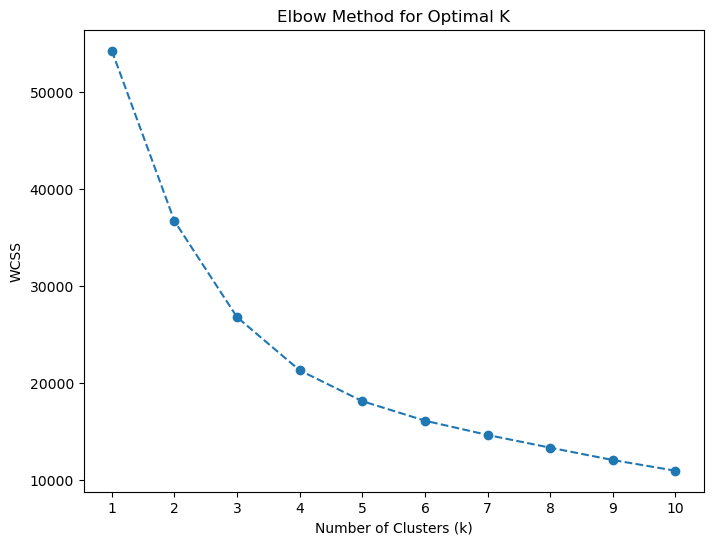

In [34]:
# plotting the WCSS values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

### 3. Run K-Means Clustering

Initialize the KMeans class with the optimal number of clusters and fit it to the standardized data.
Predict the cluster labels for each data point.

In [35]:
#initializing kmeans with 3 clusters
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=12)
y_predict = kmeans.fit_predict(retail_scaled)

In [36]:
#checking the clusters
print(y_predict)

[1 1 1 ... 0 1 0]


## Identify Customer Segmentation
 
### 1. Visualize the clusters using various charts to identify the unique attributes of each cluster

Plot the clusters to visualize how the data points are grouped.<br>
Use scatter plots and color the points by their cluster labels.<br>
Optionally, visualize the centroids of each cluster.

In [37]:
#converting the dataframe to numpy array
retail = np.array(retail_scaled)

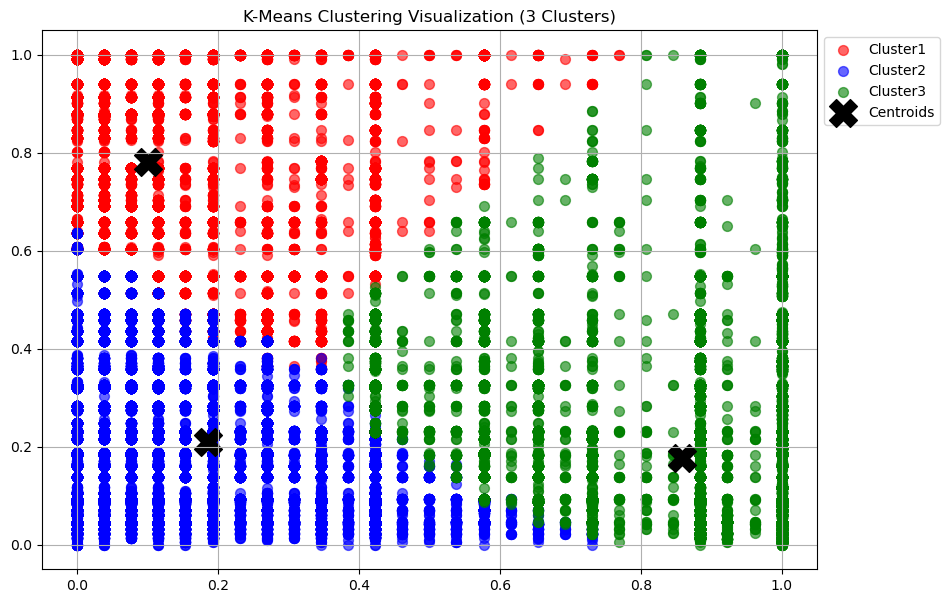

In [38]:

plt.figure(figsize=(10, 7))

# Scatter plots for each cluster
plt.scatter(retail[y_predict == 0, 0], retail[y_predict == 0, 1], s=50, c='red', alpha=0.6, label='Cluster1')
plt.scatter(retail[y_predict == 1, 0], retail[y_predict == 1, 1], s=50, c='blue', alpha=0.6, label='Cluster2')
plt.scatter(retail[y_predict == 2, 0], retail[y_predict == 2, 1], s=50, c='green', alpha=0.6, label='Cluster3')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c='black', marker='X', label='Centroids')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.title('K-Means Clustering Visualization (3 Clusters)')
plt.show()

### 2. Assign Cluster Labels to the Original Data

Add the cluster labels as a new column to the original dataset.
This will help in understanding the characteristics of each cluster.

In [39]:
#assging the cluster labels to the original dataset(unscaled dataset)
retail_capped['Cluster'] = y_predict

In [40]:
retail = retail_capped.copy() #renaming to a better name

In [41]:
retail.head()

,Quantity,UnitPrice,CustomerID,TotalAmount,Cluster
0,6.0,2.55,17850.0,15.30,1
1,6.0,3.39,17850.0,20.34,1
2,8.0,2.75,17850.0,22.00,1
5,2.0,7.65,17850.0,15.30,0
6,6.0,4.25,17850.0,25.50,0


### 3. Analyze Each Segment

- Calculate summary statistics for each cluster to understand the characteristics of the customers in each segment.<br>
- Mean, median, and standard deviation of features within each cluster.<br>
- Compare the segments based on these statistics to identify distinctive features.<br>

In [42]:
cluster_summary = retail.groupby('Cluster')[['Quantity', 'UnitPrice', 'TotalAmount']].mean()
print(cluster_summary)

          Quantity  UnitPrice  TotalAmount
Cluster                                   
0         3.625414   7.061219    23.428396
1         5.825812   1.898665     9.376035
2        23.341489   1.597353    31.703062


#### From the above we can conclude that Cluster2 are the high spenders, Cluster0 have moderate spending behavior and Cluster1 are the lowest spenders.

#### Cluster 2 (High Quantity Buyers): 
- Average Quantity: 23.34 units per transaction, the highest among all clusters, indicating bulk or high-volume purchases.
- Average Unit Price: \$1.60 per item, the lowest among all clusters, suggesting these customers focus on buying low-priced items in large quantities.
- Average Total Amount: $31.70 per transaction, the highest among all clusters, reflecting their large purchase volumes despite the low unit price.
- Insight: These customers are likely wholesale or bulk buyers, focusing on quantity over product cost.

#### Cluster 0 (Moderate Buyers):
- Average Quantity: 3.63 units per transaction, indicating moderate purchase quantities.
- Average Unit Price: \$7.06 per item, suggesting customers in this segment buy moderately priced products.
- Average Total Amount: $23.43 per transaction, indicating that these customers spend an average amount on each purchase.
- Insight: These customers are balanced buyers—neither the highest nor the lowest spenders or buyers. They may be loyal, consistent shoppers.

####  Cluster 1 (Low Spenders):
- Average Quantity: 5.83 units per transaction, slightly higher than Cluster 0.
- Average Unit Price: \$1.90 per item, significantly lower than Cluster 0, showing a preference for low-priced products.
- Average Total Amount: $9.38 per transaction, the lowest among all clusters, reflecting cost-conscious behavior.
- Insight: These customers buy in slightly higher quantities but spend less overall due to their preference for inexpensive items. They may be price-sensitive or infrequent buyers.

In [43]:
cluster_summary = retail.groupby('Cluster')[['Quantity', 'UnitPrice', 'TotalAmount']].std()
print(cluster_summary)

         Quantity  UnitPrice  TotalAmount
Cluster                                  
0        2.874464   1.787454    12.825055
1        4.103313   1.149705     6.774739
2        4.701859   1.437964    15.520275


- <b>Cluster0</b> customers display moderately diverse purchasing behavior in terms of both quantity and price.
- <b>Cluster1</b> customers are cost-conscious and tend to stick to low-priced items. Their purchasing behavior in terms of price and total spending is relatively stable, but they vary in the quantity purchased.
- <b>Cluster2</b> contains customers with highly diverse purchasing behavior, both in terms of quantity and overall spending. They are likely bulk buyers who purchase across a range of price points and transaction sizes.

In [44]:
cluster_summary = retail.groupby('Cluster')[['Quantity', 'UnitPrice', 'TotalAmount']].agg(['min','max'])
print(cluster_summary)

        Quantity       UnitPrice        TotalAmount       
             min   max       min    max         min    max
Cluster                                                   
0            1.0  21.0      3.25  9.035        4.95  48.69
1            1.0  20.0      0.00  5.750        0.00  34.50
2           11.0  27.0      0.00  9.035        0.00  48.69


- Cluster 0: Customers buy a moderate number of items at a moderate price point, with a balanced total amount spent.
- Cluster 1: Customers are focused on low-priced items, and while their transaction amounts are typically low, there is some occasional high spending.
- Cluster 2: These customers buy in bulk, with a wide price range. Their total spending can vary significantly based on quantity and pricing.

### 4. Profile the Customer Segments

- Create profiles for each customer segment based on the analysis.<br>
- Describe the typical customer in each segment (e.g., demographics, purchasing behavior).<br>
- Use visualization techniques (e.g., bar charts, box plots) to illustrate the differences between segments.

In [45]:
retail.Cluster.value_counts()

Cluster
1    84512
0    33824
2    32982
Name: count, dtype: int64

### Cluster 0: Consistent Buyers
- Behavior:
  - Customers in this segment make relatively consistent purchases, with low variation in quantity.
  - Spend moderate amounts, with no zero-spend customers (min TotalAmount > 0).
  - Purchase items across a wide range of unit prices, including high-priced items.<br>
<b>Typical Customer:</b>
A regular buyer who consistently spends moderate to high amounts, focusing on higher-value items.<BR>
### Cluster 1: Low Spenders
- Behavior:
  - Customers in this segment exhibit low quantities and unit prices, often making small or minimal purchases.
  - Includes some zero-spend customers (min TotalAmount = 0).
  - Spending is less diverse, and maximum spending is lower than in other clusters.<br>
    <b>Typical Customer:</b>
A cost-conscious or infrequent buyer who may respond to discounts or promotions.<BR>
### Cluster 2: Diverse Buyers
- Behavior:
  - The most varied segment, with a mix of high and low spenders.
  - Some customers purchase high quantities and expensive items, while others spend nothing.
  - Exhibits the widest range in all metrics (Quantity, UnitPrice, TotalAmount).<br>
<b>Typical Customer:</b>
A mix of high-value and occasional buyers, with unpredictable spending patterns

In [46]:
retail.Cluster.value_counts()

Cluster
1    84512
0    33824
2    32982
Name: count, dtype: int64

## Visualizations

#### Grouping customers by Clusters

In [47]:
cluster_counts = retail.groupby('Cluster')['CustomerID'].nunique()

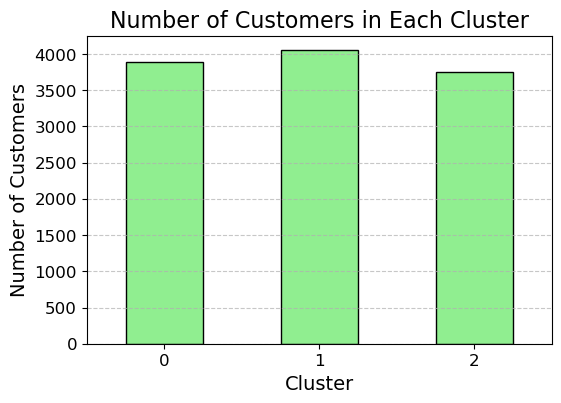

In [48]:
plt.figure(figsize=(6, 4))
cluster_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Customers in Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Cluster1 has the highest number of Customers followed by Cluster0 and Cluster2

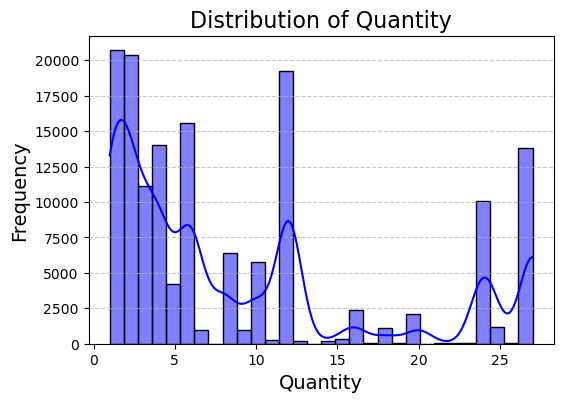

In [49]:
plt.figure(figsize=(6, 4))
sns.histplot(retail['Quantity'], kde=True, bins=30, color='blue')
plt.title('Distribution of Quantity', fontsize=16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

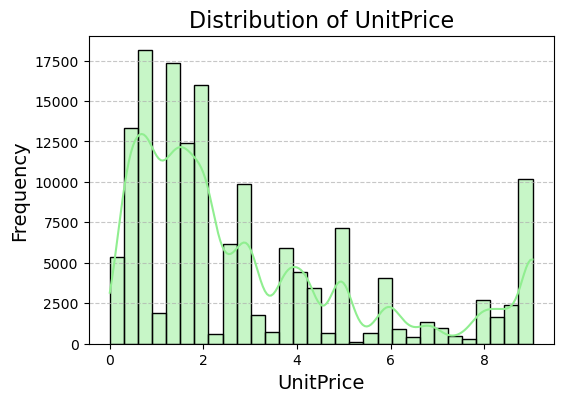

In [50]:
plt.figure(figsize=(6, 4))
sns.histplot(retail['UnitPrice'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of UnitPrice', fontsize=16)
plt.xlabel('UnitPrice', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Who are the top customers based on total spending?

In [51]:
customer_spending = retail.groupby('CustomerID')['TotalAmount'].sum().reset_index()

customer_spending.sort_values(by='TotalAmount',ascending=False,inplace=True)

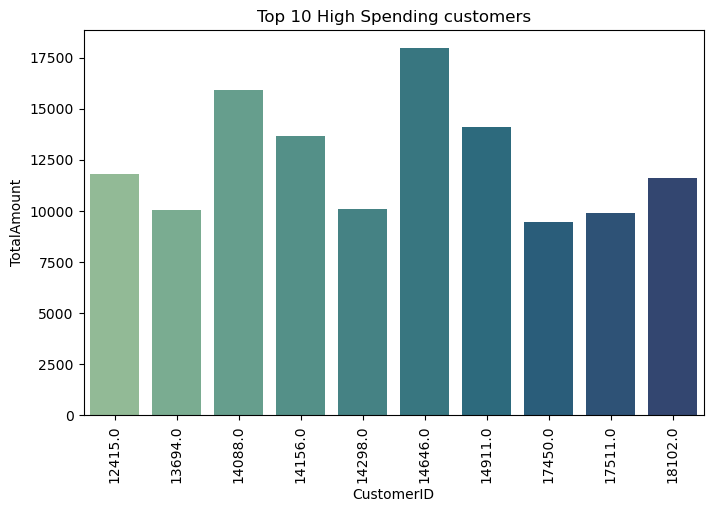

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(customer_spending.head(10),x='CustomerID',y='TotalAmount',palette='crest')
plt.title("Top 10 High Spending customers")
plt.xticks(rotation=90)
plt.show()
plt.savefig("Top10_high_spending_customers.png")

In [53]:
pivot_sum_quantity = retail.groupby('Cluster')['Quantity'].sum().reset_index()
pivot_sum_quantity

,Cluster,Quantity
0,0,122626.0
1,1,492351.0
2,2,769849.0


In [54]:
sns.set_style("whitegrid")
sns.set_palette("Blues")

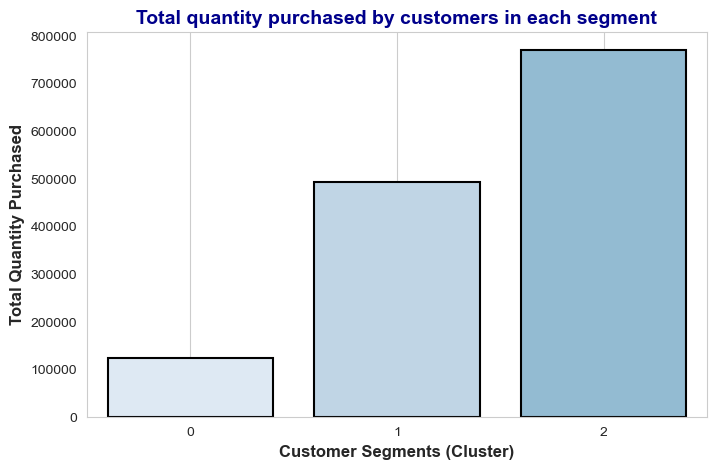

In [55]:
plt.figure(figsize=(8,5))
plt.title("Total quantity purchased by customers in each segment",fontsize=14, fontweight='bold', color='darkblue')
sns.barplot(pivot_sum_quantity,x='Cluster',y='Quantity',edgecolor='black', linewidth=1.5)
plt.xlabel("Customer Segments (Cluster)", fontsize=12, fontweight='bold')
plt.ylabel("Total Quantity Purchased", fontsize=12, fontweight='bold')
plt.grid()
plt.show()

In [56]:
pivot_cluster_price_spending = retail.pivot_table(values=['UnitPrice', 'TotalAmount'],index='Cluster',aggfunc='mean').reset_index()

print(pivot_cluster_price_spending)

   Cluster  TotalAmount  UnitPrice
0        0    23.428396   7.061219
1        1     9.376035   1.898665
2        2    31.703062   1.597353


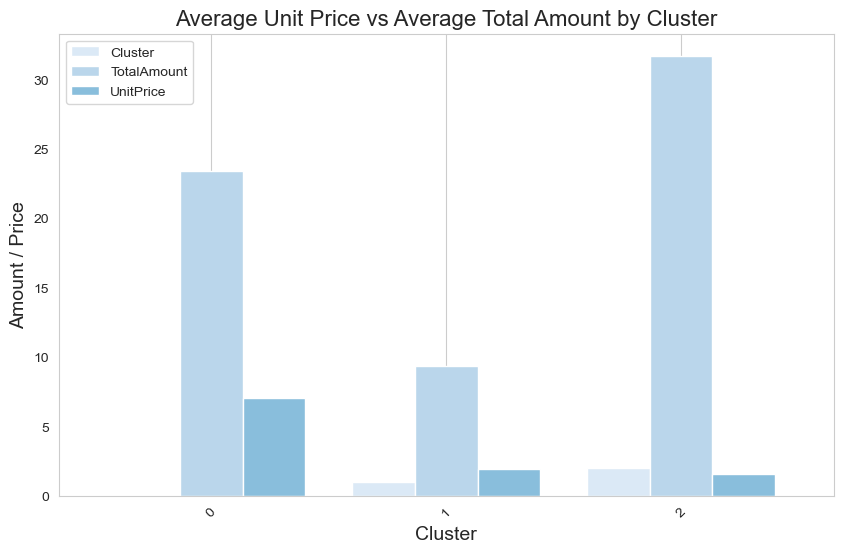

In [57]:
# Bar plot for Average Unit Price vs Average Total Amount by Cluster
pivot_cluster_price_spending.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Average Unit Price vs Average Total Amount by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Amount / Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


- High-value clusters might prefer more expensive items (higher UnitPrice), or they might be shopping for premium goods, resulting in higher TotalAmount.
- Low-value clusters might be purchasing lower-priced items, leading to smaller total amounts.

In [58]:
pivot_purchase_frequency = retail.groupby('Cluster').agg(purchase_frequency=('Quantity', 'count'),total_quantity=('Quantity', 'sum')).reset_index()

print(pivot_purchase_frequency)

   Cluster  purchase_frequency  total_quantity
0        0               33824        122626.0
1        1               84512        492351.0
2        2               32982        769849.0


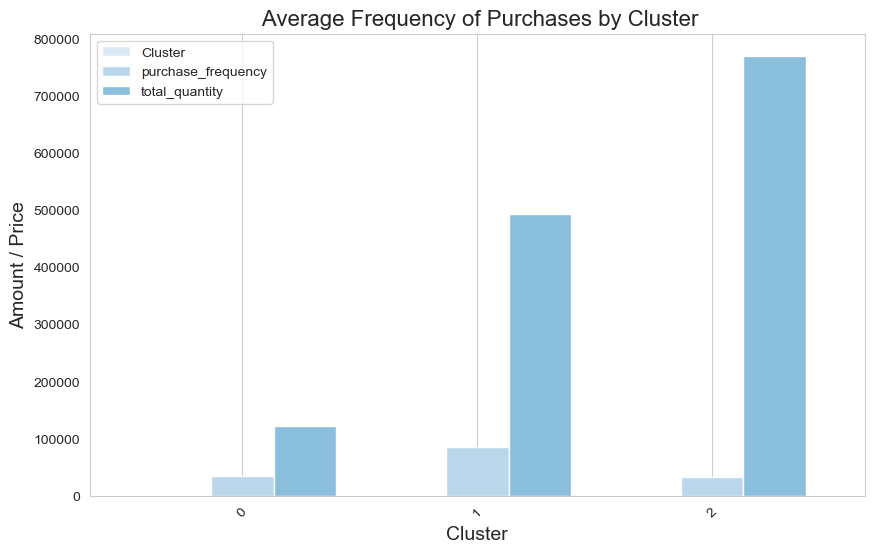

In [59]:
# Bar plot for Average Unit Price vs Average Total Amount by Cluster
pivot_purchase_frequency.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title(' Average Frequency of Purchases by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Amount / Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### 2.	What is the average spending (TotalAmount) per customer?

   Cluster  AverageSpending
0        0       204.079851
1        1       195.651231
2        2       278.760437


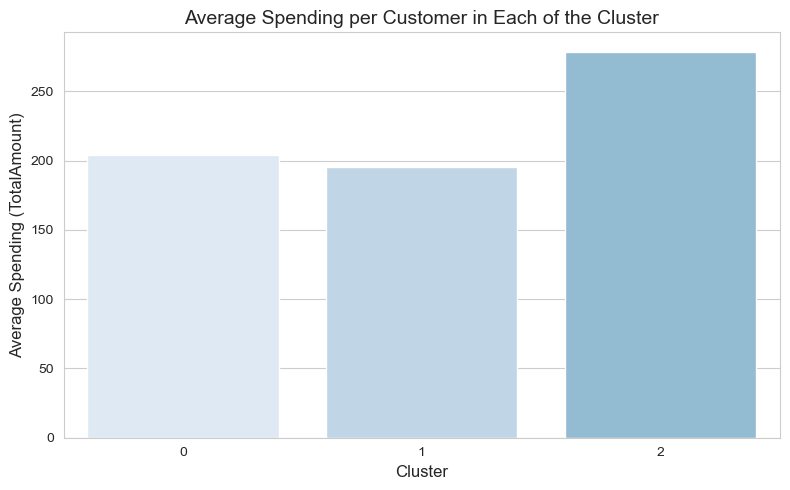

In [60]:
# Grouping by Cluster and CustomerID to calculate total spending per customer within each cluster
cluster_spending = retail.groupby(['Cluster', 'CustomerID'])['TotalAmount'].sum().reset_index()

# Calculating the average spending per customer for each cluster
cluster_avg_spending = cluster_spending.groupby('Cluster')['TotalAmount'].mean().reset_index()
cluster_avg_spending.columns = ['Cluster', 'AverageSpending']

# Displaying the average spending per cluster
print(cluster_avg_spending)

plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_avg_spending, x='Cluster', y='AverageSpending')
plt.title('Average Spending per Customer in Each of the Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Spending (TotalAmount)', fontsize=12)
plt.tight_layout()
plt.show()

### Are there any clusters with high spending but low purchase frequency?
#### Ans = There are no clusters with high spending but low purchase frequency

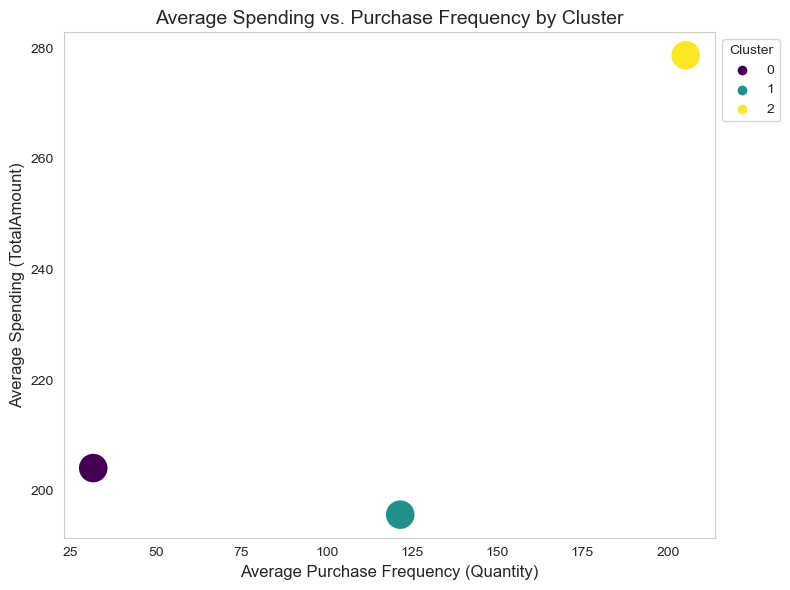

In [61]:
# grouping CustomerID and Clusters first for unbiased results due to different number of transactions for customers
cluster_spending_frequency = retail.groupby(['Cluster', 'CustomerID']).agg({'TotalAmount': 'sum','Quantity': 'sum'}).reset_index()

# calculating the average spending and average purchase frequency per cluster
cluster_analysis = cluster_spending_frequency.groupby('Cluster').agg({'TotalAmount': 'mean','Quantity': 'mean'}).reset_index()
cluster_analysis.columns = ['Cluster', 'AvgSpending', 'AvgPurchaseFrequency']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster_analysis,x='AvgPurchaseFrequency',y='AvgSpending',hue='Cluster',palette='viridis',s=500)
plt.title('Average Spending vs. Purchase Frequency by Cluster', fontsize=14)
plt.xlabel('Average Purchase Frequency (Quantity)', fontsize=12)
plt.ylabel('Average Spending (TotalAmount)', fontsize=12)
plt.grid()
plt.legend(title='Cluster',bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

### Which customers make the most frequent purchases?

Top 10 Customers by Purchase Frequency:
      CustomerID  Quantity
1690     14646.0    9445.0
1880     14911.0    7155.0
1435     14298.0    6773.0
1334     14156.0    6684.0
55       12415.0    6454.0
4202     18102.0    6024.0
1285     14088.0    6014.0
997      13694.0    5993.0
3772     17511.0    5314.0
3729     17450.0    5031.0


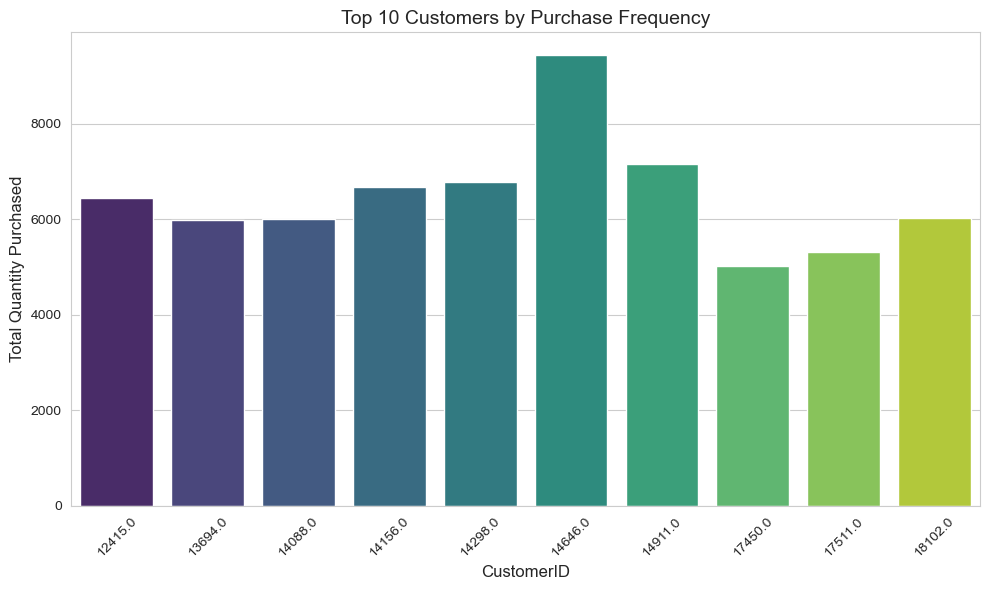

In [62]:
# calculating the purchase frequency (Quantity) per customer
customer_frequency = retail.groupby('CustomerID')['Quantity'].sum().reset_index()

# sorting purchase frequency in descending order
customer_frequency = customer_frequency.sort_values(by='Quantity', ascending=False)

# Top 10 most frequent customers
top_frequent_customers = customer_frequency.head(10)
print("Top 10 Customers by Purchase Frequency:")
print(top_frequent_customers)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_frequent_customers, x='CustomerID', y='Quantity', palette='viridis')
plt.title('Top 10 Customers by Purchase Frequency', fontsize=14)
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Total Quantity Purchased', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Which clusters tend to purchase items with the highest unit price?

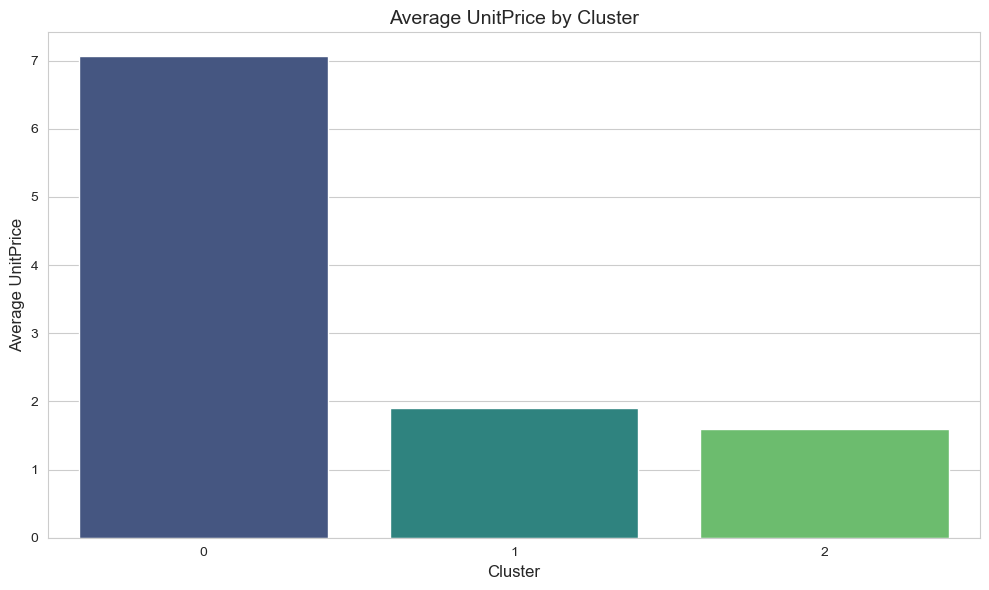

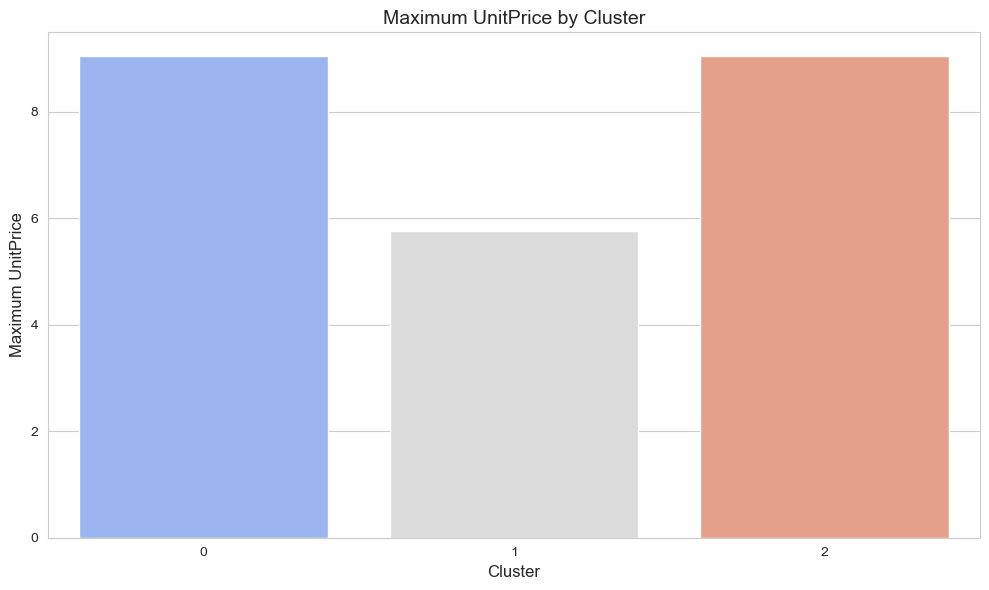

In [63]:
# Calculate average and maximum UnitPrice for each cluster
cluster_unitprice_stats = retail.groupby('Cluster')['UnitPrice'].agg(['mean', 'max']).reset_index()
cluster_unitprice_stats = cluster_unitprice_stats.rename(columns={'mean': 'Average UnitPrice', 'max': 'Maximum UnitPrice'})

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_unitprice_stats, x='Cluster', y='Average UnitPrice', palette='viridis')
plt.title('Average UnitPrice by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average UnitPrice', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Visualize maximum UnitPrice for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_unitprice_stats, x='Cluster', y='Maximum UnitPrice', palette='coolwarm')
plt.title('Maximum UnitPrice by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Maximum UnitPrice', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

- Cluster0 customers prefer premium products whereas Cluster1 andClsuter2 customers favor budget-friendly items.
- Cluster0 and Cluster2 customers might be willing to spend on luxury or high-value items.

### Which cluster contributes the most revenue to the business?

Total Revenue by Cluster:
    Cluster  TotalAmount
2        2  1045630.400
0        0   792442.060
1        1   792387.484


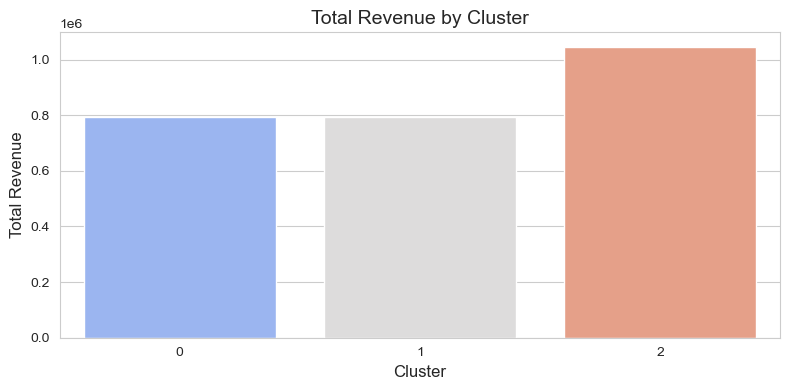

In [64]:
# calculating total revenue for each cluster
cluster_revenue = retail.groupby('Cluster')['TotalAmount'].sum().reset_index()
#cluster_revenue = cluster_revenue.rename(columns={'TotalAmount': 'Total Revenue'})
cluster_revenue = cluster_revenue.sort_values(by='TotalAmount', ascending=False)

print('Total Revenue by Cluster:\n',cluster_revenue)

plt.figure(figsize=(8, 4))
sns.barplot(data=cluster_revenue, x='Cluster', y='TotalAmount', palette='coolwarm')
plt.title('Total Revenue by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

- Cluster2 with the highest total revenue is the most valuable customer segment for the business.
- This cluster likely consists of high-spending customers

### How does spending behavior vary between clusters?

   Cluster  Average_Total_Amount  Average_Quantity  Average_Unit_Price
2        2             31.703062         23.341489            1.597353
0        0             23.428396          3.625414            7.061219
1        1              9.376035          5.825812            1.898665


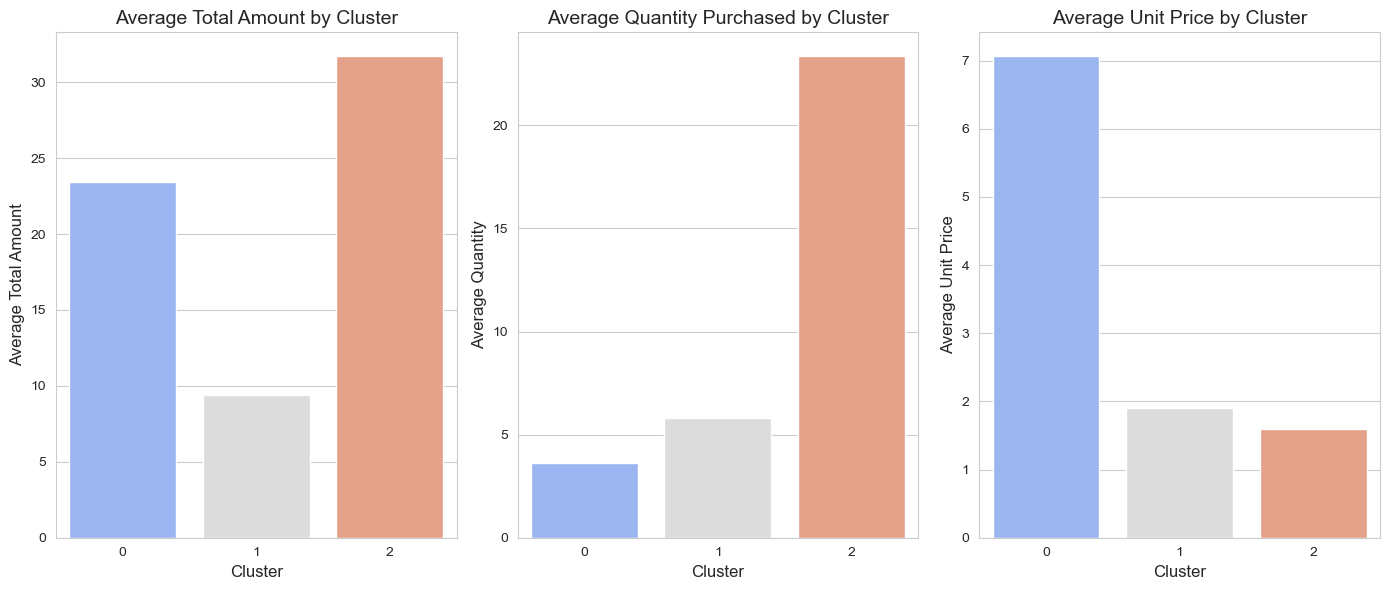

In [65]:
# Calculating key metrics for each cluster
cluster_behavior = retail.groupby('Cluster').agg(
    Average_Total_Amount=('TotalAmount', 'mean'),
    Average_Quantity=('Quantity', 'mean'),
    Average_Unit_Price=('UnitPrice', 'mean')
).reset_index()

# Sorting by average total amount
cluster_behavior = cluster_behavior.sort_values(by='Average_Total_Amount', ascending=False)

print(cluster_behavior)

plt.figure(figsize=(14, 6))
metrics = ['Average_Total_Amount', 'Average_Quantity', 'Average_Unit_Price']
titles = ['Average Total Amount by Cluster', 
          'Average Quantity Purchased by Cluster', 
          'Average Unit Price by Cluster']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.barplot(data=cluster_behavior, x='Cluster', y=metric, palette='coolwarm')
    plt.title(titles[i], fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(metric.replace('_', ' '), fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
plt.tight_layout()
plt.show()


- Cluster0 customers likely prefer premium-priced items.
- Cluster1 are moderate buyers
- Cluster2 customers are price-sensitive customers focused on value for money.

### Are there any clusters with consistently low spending?

   Cluster  Total_Revenue  Average_Spending_Per_Transaction  \
1        1     792387.484                          9.376035   
0        0     792442.060                         23.428396   
2        2    1045630.400                         31.703062   

   Average_Quantity_Purchased  
1                    5.825812  
0                    3.625414  
2                   23.341489  


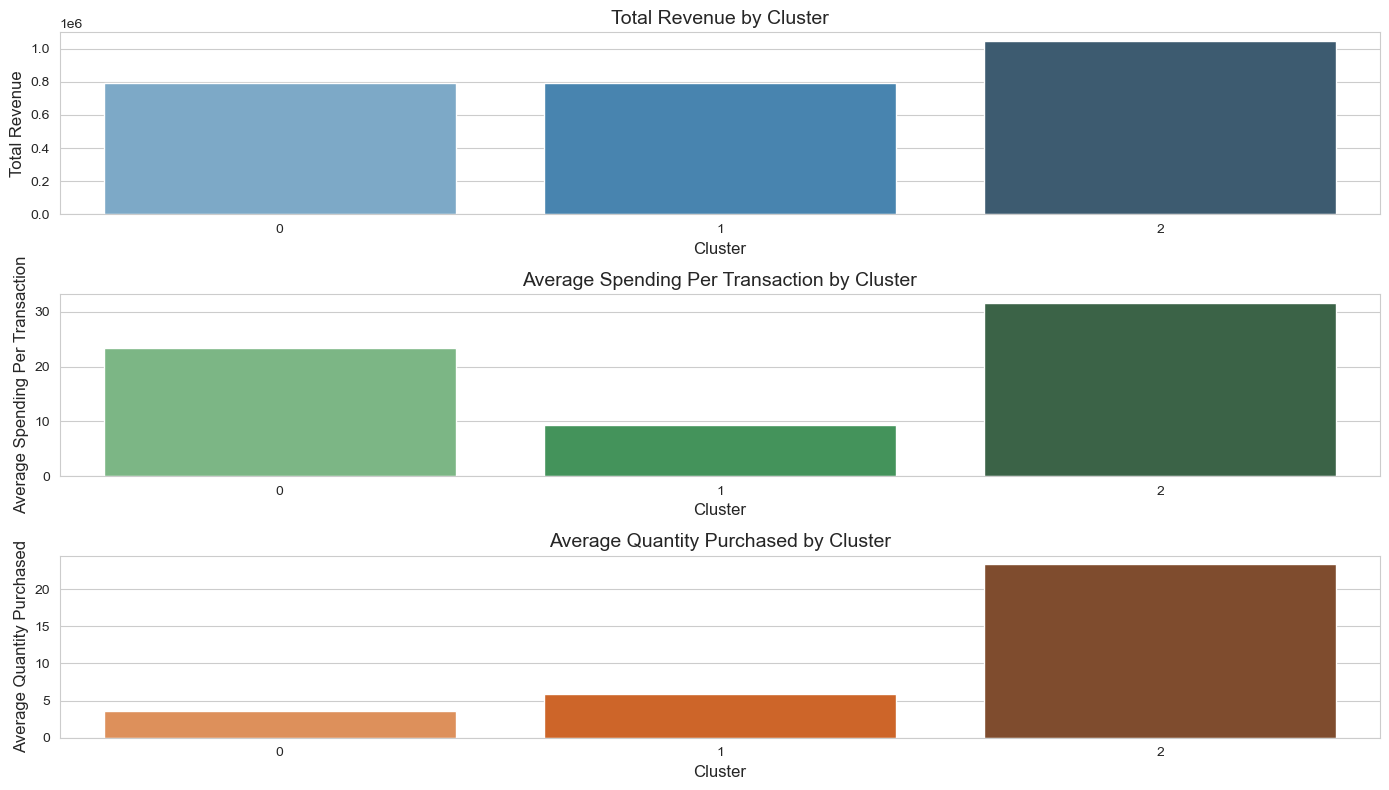

In [66]:
# calculating spending metrics for each cluster
low_spending_clusters = retail.groupby('Cluster').agg(Total_Revenue=('TotalAmount', 'sum'),Average_Spending_Per_Transaction=('TotalAmount', 'mean'),Average_Quantity_Purchased=('Quantity', 'mean')).reset_index()

# Sort clusters by Total Revenue to identify low-spending clusters
low_spending_clusters = low_spending_clusters.sort_values(by='Total_Revenue', ascending=True)

print(low_spending_clusters)

plt.figure(figsize=(14, 8))

# Total Revenue Plot
plt.subplot(3, 1, 1)
sns.barplot(data=low_spending_clusters, x='Cluster', y='Total_Revenue', palette='Blues_d')
plt.title('Total Revenue by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Average Spending Per Transaction Plot
plt.subplot(3, 1, 2)
sns.barplot(data=low_spending_clusters, x='Cluster', y='Average_Spending_Per_Transaction', palette='Greens_d')
plt.title('Average Spending Per Transaction by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Spending Per Transaction', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Average Quantity Purchased Plot
plt.subplot(3, 1, 3)
sns.barplot(data=low_spending_clusters, x='Cluster', y='Average_Quantity_Purchased', palette='Oranges_d')
plt.title('Average Quantity Purchased by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Quantity Purchased', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


- Cluster1

### What is the total revenue generated by the store?

In [67]:
# Calculating the total Amount
total_revenue = retail['TotalAmount'].sum()

print(f"The total revenue generated by the store is: ${total_revenue:.2f}")

The total revenue generated by the store is: $2630459.94


### What percentage of revenue is contributed by the top 10% of customers?

In [68]:
# calculating total spending per customer
customer_revenue = retail.groupby('CustomerID')['TotalAmount'].sum().reset_index()

# sorting customers by revenue in descending order
customer_revenue = customer_revenue.sort_values(by='TotalAmount', ascending=False)

# getting the top 10%
top_10_percent_count = int(0.1 * len(customer_revenue))

# getting the revenue for top 10%
top_10_percent_revenue = customer_revenue.head(top_10_percent_count)['TotalAmount'].sum()

# calculating Total Revenue
total_revenue = customer_revenue['TotalAmount'].sum()

# Calculating percentage contribution
percentage_contribution = (top_10_percent_revenue / total_revenue) * 100

print(f"The top 10% of customers contribute {percentage_contribution:.2f}% of the total revenue.")

The top 10% of customers contribute 38.54% of the total revenue.


### What is the revenue contribution of each cluster?

Revenue contribution by each cluster:
   Cluster  TotalAmount  Percentage_Contribution
2        2  1045630.400                39.750858
0        0   792442.060                30.125608
1        1   792387.484                30.123534


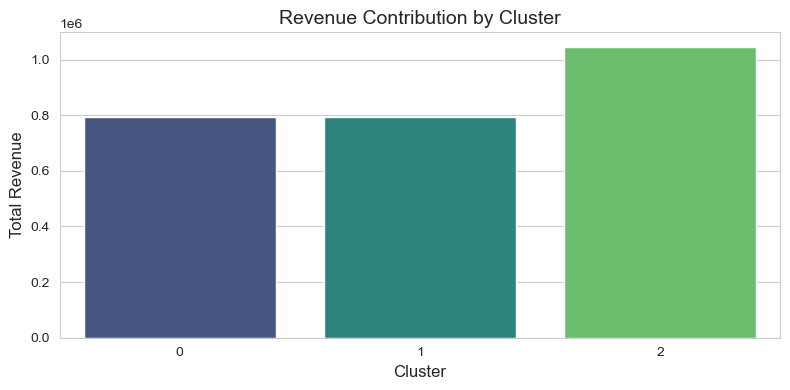

In [69]:
# calculatng total revenue per cluster
cluster_revenue = retail.groupby('Cluster')['TotalAmount'].sum().reset_index()

# calculating total revenue
total_revenue = cluster_revenue['TotalAmount'].sum()

# calculating percentage contribution for each cluster
cluster_revenue['Percentage_Contribution'] = (cluster_revenue['TotalAmount'] / total_revenue) * 100

# sorting the clsuters by total revenue
cluster_revenue = cluster_revenue.sort_values(by='TotalAmount', ascending=False)

print("Revenue contribution by each cluster:")
print(cluster_revenue)

plt.figure(figsize=(8, 4))
sns.barplot(data=cluster_revenue, x='Cluster', y='TotalAmount', palette='viridis')
plt.title('Revenue Contribution by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Should the store focus more on increasing quantity sold or unit price to boost revenue?

Correlation between TotalAmount and Quantity: 0.56
Correlation between TotalAmount and UnitPrice: 0.30


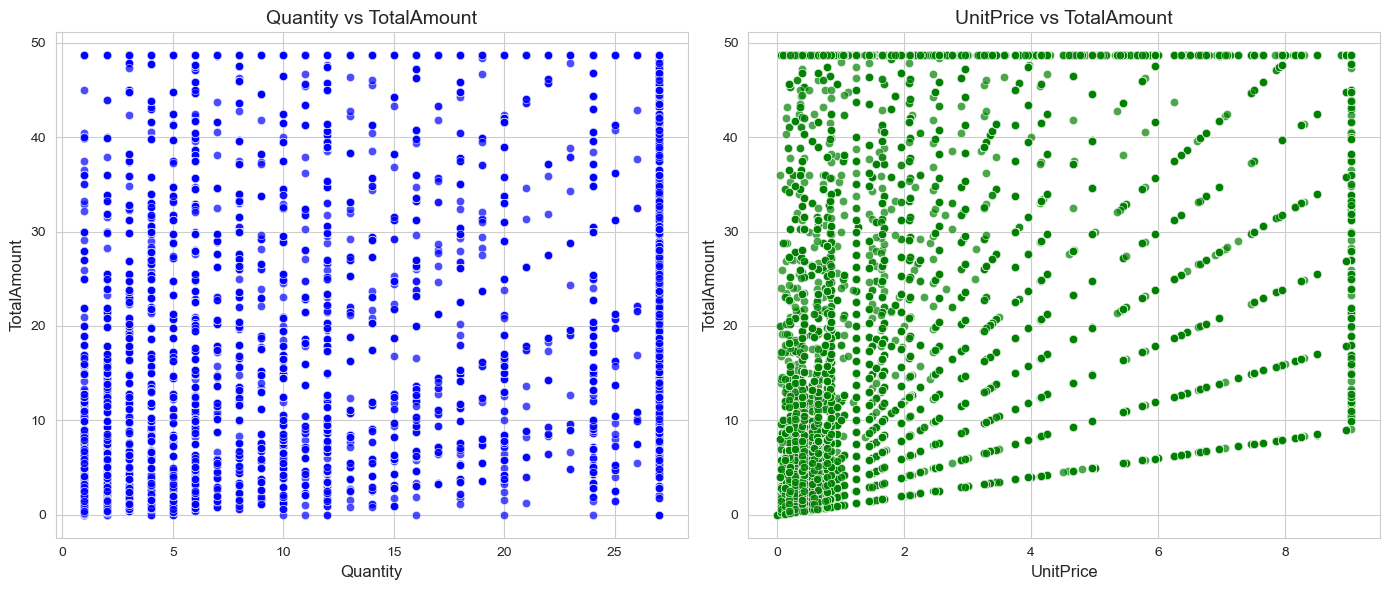

Average Quantity: 9.15
Average UnitPrice: 2.99


In [70]:
# Step 1: Calculate correlations
corr_quantity = retail[['TotalAmount', 'Quantity']].corr().iloc[0, 1]
corr_unitprice = retail[['TotalAmount', 'UnitPrice']].corr().iloc[0, 1]

print(f"Correlation between TotalAmount and Quantity: {corr_quantity:.2f}")
print(f"Correlation between TotalAmount and UnitPrice: {corr_unitprice:.2f}")


plt.figure(figsize=(14, 6))

# Scatterplot for Quantity vs TotalAmount
plt.subplot(1, 2, 1)
sns.scatterplot(data=retail, x='Quantity', y='TotalAmount', alpha=0.7, color='blue')
plt.title('Quantity vs TotalAmount', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('TotalAmount', fontsize=12)

# Scatterplot for UnitPrice vs TotalAmount
plt.subplot(1, 2, 2)
sns.scatterplot(data=retail, x='UnitPrice', y='TotalAmount', alpha=0.7, color='green')
plt.title('UnitPrice vs TotalAmount', fontsize=14)
plt.xlabel('UnitPrice', fontsize=12)
plt.ylabel('TotalAmount', fontsize=12)

plt.tight_layout()
plt.show()

print(f"Average Quantity: {retail['Quantity'].mean():.2f}")
print(f"Average UnitPrice: {retail['UnitPrice'].mean():.2f}")

- The store should focus more on increasing quantity sold rather than raising unit prices to boost revenue.
- 

Promotions to increase quantity sold:

- Bundle discounts: Offer discounts for purchasing in bulk.
Loyalty programs: Reward customers who buy more frequently or in larger quantities.
Flash sales: Encourage customers to stock up by providing time-limited offers.
Strategic pricing for higher revenue:

- Conduct price elasticity analysis: Identify products where slight price increases won’t impact demand significantly.
Upsell premium products: Introduce higher-priced alternatives for customers willing to pay more.
Segmented strategy by cluster:

- Analyze clusters to identify which groups are most sensitive to price and which are more likely to increase their quantity.


In [71]:
retail.head()

,Quantity,UnitPrice,CustomerID,TotalAmount,Cluster
0,6.0,2.55,17850.0,15.30,1
1,6.0,3.39,17850.0,20.34,1
2,8.0,2.75,17850.0,22.00,1
5,2.0,7.65,17850.0,15.30,0
6,6.0,4.25,17850.0,25.50,0


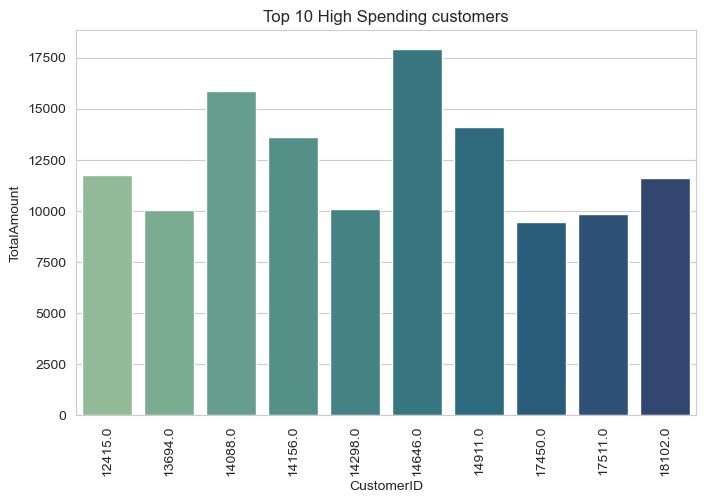

<Figure size 640x480 with 0 Axes>

In [72]:
plt.figure(figsize=(8,5))
sns.barplot(customer_spending.head(10),x='CustomerID',y='TotalAmount',palette='crest')
plt.title("Top 10 High Spending customers")
plt.xticks(rotation=90)
plt.show()
plt.savefig("Top10_high_spending_customers.png")

### What is the percentage of revenue distribution of each customer?

In [73]:
revenue_per_cluster = retail.groupby('Cluster')['TotalAmount'].sum().reset_index()

In [74]:
revenue_per_cluster.head()

,Cluster,TotalAmount
0,0,792442.060
1,1,792387.484
2,2,1045630.400


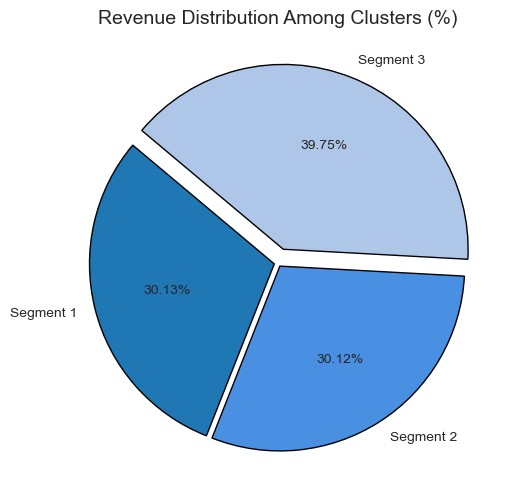

In [75]:
# calculating the precentages for each cluster
revenue_per_cluster['Percentage'] = (revenue_per_cluster['TotalAmount'] / revenue_per_cluster['TotalAmount'].sum()) * 100

# plotting the pie chart
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#4a90e2', '#aec7e8']  # Blue-themed colors
explode = (0.02, 0.02, 0.08)

plt.pie(
    revenue_per_cluster['Percentage'], 
    labels=['Segment ' + str(c+1) for c in revenue_per_cluster['Cluster']], 
    autopct='%1.2f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode, 
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title('Revenue Distribution Among Clusters (%)', fontsize=14)
plt.show()
